In [2]:
#import packages
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import numpy as np

In [3]:
#define webiste url and get content
url = 'https://www.the-numbers.com/market/distributors'
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [4]:
#clean up the html code
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
<meta content="521546213" property="fb:admins"/>

In [5]:
#define data as a list
data = []

#find table
results = soup.select('table')[0]

#find all tr elements
rows = results.find_all(['tr'])

#find data in td tags
for row in rows:
    cols = row.find_all('td')
    #get text
    cols = [ele.text.strip() for ele in cols]
    #remove header row
    data.append(cols[1:])

#name columns
cols = ['Distributor', 'Number of Movies', 'Box Office Total', 'Ticket Sales', 'Market Share']
#define dataframe
#remove redundant "Rank" column
df = pd.DataFrame(data[1:], columns = cols)

#return head of table
df.head()

df.to_pickle('daves_data.pkl')

In [6]:
#convert numerical data from objects into integers and floats
df['Number of Movies'] = df['Number of Movies'].astype(int)

df['Box Office Total'] = df['Box Office Total'].str.replace('$', '')
df['Box Office Total'] = df['Box Office Total'].str.replace(',', '')
df['Box Office Total'] = df['Box Office Total'].astype(float)

df['Ticket Sales'] = df['Ticket Sales'].str.replace(',', '')
df['Ticket Sales'] = df['Ticket Sales'].astype(float)

df['Market Share'] = df['Market Share'].str.replace('%', '')
df['Market Share'] = df['Market Share'].astype(float)

#check the datatypes
df.dtypes

Distributor          object
Number of Movies      int32
Box Office Total    float64
Ticket Sales        float64
Market Share        float64
dtype: object

In [7]:
#create a new variable for the rows that have a market share less than 10%
remaining = df[6:884]
remaining

,Distributor,Number of Movies,Box Office Total,Ticket Sales,Market Share
6,Lionsgate,416,9.538425e+09,1.211612e+09,4.07
7,New Line,207,6.195612e+09,1.116466e+09,2.64
8,Dreamworks SKG,77,4.278649e+09,7.604313e+08,1.83
9,Miramax,384,3.835979e+09,7.140996e+08,1.64
10,MGM,238,3.705595e+09,6.640381e+08,1.58
...,...,...,...,...,...
879,levelFILM,1,1.037000e+03,1.270000e+02,0.00
880,Gunnison Galaxy,1,9.030000e+02,1.040000e+02,0.00
881,Cinevolve Studios,2,8.940000e+02,1.180000e+02,0.00
882,Oilrag Productions,1,8.310000e+02,1.260000e+02,0.00


In [8]:
#create variables for the averages of the lower rows
rem_num_movie = remaining['Number of Movies'].mean()
rem_box_office = remaining['Box Office Total'].mean()
rem_tickets = remaining['Ticket Sales'].mean()
rem_market_share = remaining['Market Share'].mean()*100
print(rem_num_movie)
print(rem_box_office)
print(rem_tickets)
print(rem_market_share)

13.296127562642369
59863246.23006833
9056503.785876993
2.5239179954442


In [9]:
#drop the first row because the company owns most of the studios that make the movies they distribute
#drop all of the rows with a market share less than 10%
#market share values and remaining average value will be used to create bar graph in separate notebook
df = df[1:6]
df

,Distributor,Number of Movies,Box Office Total,Ticket Sales,Market Share
1,Warner Bros.,803,3.564125e+10,5.133326e+09,15.21
2,Sony Pictures,732,2.877570e+10,4.257975e+09,12.28
3,Universal,511,2.746428e+10,3.938556e+09,11.72
4,20th Century Fox,520,2.585503e+10,3.792393e+09,11.03
5,Paramount Pictures,483,2.423633e+10,3.647719e+09,10.34


In [10]:
#create new variablrs to get the average box office total and average ticket sales per movie
box_office_per_movie = df['Box Office Total']/df['Number of Movies']
tickets_per_movie = df['Ticket Sales']/df['Number of Movies']
print(box_office_per_movie)
print(tickets_per_movie)

1    4.438511e+07
2    3.931107e+07
3    5.374614e+07
4    4.972121e+07
5    5.017874e+07
dtype: float64
1    6.392685e+06
2    5.816906e+06
3    7.707545e+06
4    7.293064e+06
5    7.552213e+06
dtype: float64


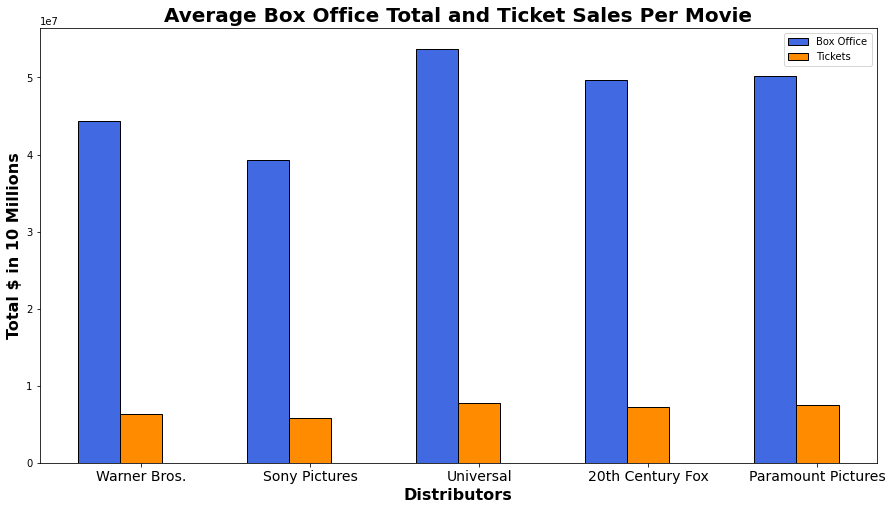

In [11]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

#determine bar width
barWidth = 0.25

#input values for each bar in double bar graph
bars1 = box_office_per_movie
bars2 = tickets_per_movie

#determine position of each bar
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

#size, format and label the data in the graph
plt.figure(figsize=(15,8))
plt.bar(r1, bars1, color='royalblue', width=barWidth, edgecolor='black', label='Box Office')
plt.bar(r2, bars2, color='darkorange', width=barWidth, edgecolor='black', label='Tickets')

#add xticks on the middle of the group bars and label each axis
plt.title('Average Box Office Total and Ticket Sales Per Movie', fontweight='bold', fontsize=20)
plt.xlabel('Distributors', fontweight='bold', fontsize=16)
plt.xticks([r + barWidth for r in range(len(bars1))], ['Warner Bros.', 'Sony Pictures', 'Universal', 
                                                       '20th Century Fox', 'Paramount Pictures'], fontsize=14)
plt.ylabel('Total $ in 10 Millions', fontweight='bold', fontsize=16)

#create legend and show the graph
plt.legend()
plt.savefig('images/avg_box_office_tickets.png', dpi=300)
plt.show()

In [12]:
# Function to convert money string to integer
def money_str_int(str):
    number = int(str.strip('$').replace(',',''))
    return number

In [13]:
# LOAD CAT'S DATA
df_movie_3 = pd.read_pickle('cats_bomojo_data.pkl')
df_movie_3.head(3)

,Rank,Title,Lifetime Gross,Year,URL,Distributor,Budget,Rating,Running_Time_hrs,Genres
0,1,Star Wars: Episode VII - The Force Awakens,936662225,2015,https://www.boxofficemojo.com/title/tt2488496/...,Walt Disney Studios Motion Pictures,245000000,PG-13,2.3,"Action,Adventure,Sci-Fi"
1,2,Avengers: Endgame,858373000,2019,https://www.boxofficemojo.com/title/tt4154796/...,Walt Disney Studios Motion Pictures,356000000,PG-13,3.02,"Action,Adventure,Drama,Sci-Fi"
2,3,Avatar,760507625,2009,https://www.boxofficemojo.com/title/tt0499549/...,Twentieth Century Fox,237000000,PG-13,2.7,"Action,Adventure,Fantasy,Sci-Fi"


In [14]:
# Get data of home market distributors
url= 'https://www.the-numbers.com/home-market/distributors'
response = requests.get('https://www.the-numbers.com/home-market/distributors')
soup = BeautifulSoup(response.text, 'lxml')
art_body= soup.find_all('table', id = 'page_filling_chart')
for body in art_body:
    print(art_body.text)

In [15]:
# Confirm webscrape status
response.status_code

200

In [16]:
# Find basic information on chart
df_list = pd.read_html(response.text) 
df_home = df_list[0]
df_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Home Market Distributors            614 non-null    object
 1   No. of Movies                       614 non-null    int64 
 2   Total Domestic Home Market Revenue  614 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.5+ KB


In [17]:
# confirm the columns in the chart
df_home.columns

Index(['Home Market Distributors', 'No. of Movies',
       'Total Domestic Home Market Revenue'],
      dtype='object')

In [18]:
# confirm there isn't missing data
df_home.isna().sum()

Home Market Distributors              0
No. of Movies                         0
Total Domestic Home Market Revenue    0
dtype: int64

In [19]:
#In conclusion, we recommend that if Microsoft partners with Universal, 20th Century Fox, or Paramount as their distribution company in a theatrical release in order to maximize revenue. Should they decide to go straight to home distribution, we also recommend these companies, along with Sony Pictures. Finally, we found that PG-13 movies in the Action & Adventure genre were the preferred movie type of these firms.